In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

import seaborn as sns

df = pd.read_csv("titanic-passengers.csv", sep=";")

# Preprocessing the data
# Replacing null age with mean
df['Age'].fillna((df['Age'].median()), inplace=True)

# Dropping Cabin coulmn since most of it is blank
df.drop(['Cabin'], axis = 1, inplace=True)
df['Fare'] = df['Fare'].round(0) 
df = pd.get_dummies(df, columns =['Sex','Pclass', 'Survived', 'Embarked'], drop_first=True)

df.drop(['Name'], axis = 1, inplace=True)
df.drop(['Ticket'], axis = 1, inplace=True)
df.drop(['PassengerId'], axis = 1, inplace=True)
df.head()


,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Survived_Yes,Embarked_Q,Embarked_S
0,28.0,0,0,13.0,1,1,0,0,0,1
1,25.0,0,0,8.0,1,0,1,0,0,1
2,20.0,0,0,8.0,1,0,1,0,0,1
3,29.0,0,4,21.0,0,0,1,0,0,1
4,31.0,1,0,52.0,1,0,0,0,0,1


In [28]:
X = df.drop("Survived_Yes", axis=1)
y = df["Survived_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.30,random_state=50)

logmodel = LogisticRegression(random_state = 50)
logmodel.fit(X_train, y_train)

pred = logmodel.predict(X_test)
pred

C:\Users\youss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0], dtype=uint8)

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[141,  22],
       [ 38,  67]], dtype=int64)

Train/Test split results:
LogisticRegression accuracy is 0.776
LogisticRegression log_loss is 0.479
LogisticRegression auc is 0.831


C:\Users\youss\AppData\Local\Temp/ipykernel_24776/1946035279.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
C:\Users\youss\AppData\Local\Temp/ipykernel_24776/1946035279.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


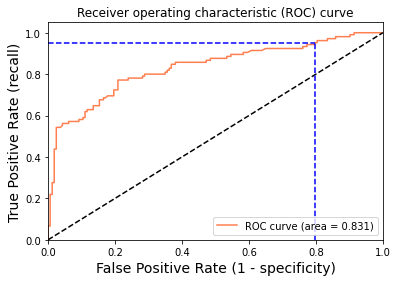

Using a threshold of 0.092 guarantees a sensitivity of 0.952 and a specificity of 0.202, i.e. a false positive rate of 79.75%.


In [36]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss,accuracy_score 

y_pred = logmodel.predict(X_test)
y_pred_proba = logmodel.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logmodel.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logmodel.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logmodel.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))